<a href="https://colab.research.google.com/github/mvenouziou/Project-Attention-Is-What-You-Get/blob/main/bms_molecular_translation_AttentionIsWhatYouGet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load project

In [1]:
!git clone https://github.com/mvenouziou/Project-Attention-Is-What-You-Get.git ./AttentionProject

Cloning into './AttentionProject'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 69 (delta 32), reused 18 (delta 5), pack-reused 0
Unpacking objects: 100% (69/69), done.


# Attention is What You Get

This is my entry into the [Bristol-Myers Squibb Molecular Translation](https://www.kaggle.com/c/bms-molecular-translation)  Kaggle competition.

-----

AUTHOR: 

Mo Venouziou

- *Email: mvenouziou@gmail.com*
- *LinkedIn: www.linkedin.com/in/movenouziou/*

Updates:

 - *Original Posting: June 2, 2021*
 - *06/21/21: added TPU compatability*

----

### Our Goal: Predict the "InChI" value of any given chemical compound diagram. 

International Chemical Identifiers ("InChI values") are a standardized encoding to describe chemical compounds. They take the form of a string of letters, numbers and deliminators, often between 100 - 400 characters long. 

The chemical diagrams are provided as PNG files, often of such low quality that it may take a human several seconds to decipher. 

Label length and image quality become a serious challenge here, because we must predict labels for a very large quantity of images. There are 1.6 million images in the test set abd 2.4 million images available in the training set!

Given a chemical compound image, can we determine its InChI value string?

Sample InChI Value:
InChI=1S/C14H15BrN2O3/c1-3-4-10-12(18)16-14(20)17(13(10)19)11-7-9(15)6-5-8(11)2/h5-7,10H,3-4H2,1-2H3,(H,16,18,20)

Sample InChI Diagram:


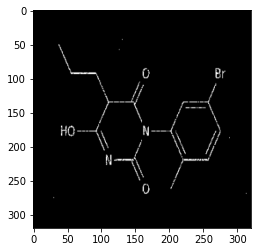

In [35]:
print('Given a chemical compound image, can we determine its InChI value string?\n')
with open('./AttentionProject/sample_inchi_value.txt') as f:
    print('Sample InChI Value:\n', f.read(), '\n', sep='')

from PIL import Image
print('Sample InChI Diagram:')
Image.open('./AttentionProject/sample_InChI_diagram.png')

## MODEL STRUCTURE: 

**Image CNN + Attention Features encoder --> text Attention + (optional )CNN feature layer decoder.**

This is a hybrid approach with:
 
 - Overall strategy from [*Show, Attend and Tell: Neural Image Caption Generation with Visual Attention*](https://proceedings.mlr.press/v37/xuc15.pdf).  Generate image feature vectors using a CNN then decode using an attention-aware process. (The paper uses an LSTM decoder, but this notebook uses Attention Transformers instead.)
 
 - Transformer encoder-decoder model from [*Attention Is All You Need*](https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf) (Self-attention feature extraction for both encoder and decoder, joint encoder-decoder attention feature interactions, and a dense prediction output block. Includes parameters to control number of encoder / decoder blocks.)

 - ***PLUS*** *(optional):* Decoder Output Blocks placed in Series (not stacked). Increase the number of trainable parameters without adding inference computational complexity, while also allowing decoders to specialize on different regions of the output.
 
 - ***PLUS*** *(optional):* Is attention really all you need? Add a convolutional layer to enhance text features before decoder self-attention to experiment with performance differences with and without extra convolutional layer(s). Use of CNN's in NLP comes from [*Convolutional Sequence to Sequence Learning*](http://proceedings.mlr.press/v70/gehring17a.html.)

 - ***PLUS*** *(optional):* Beam-Search Alternative, an extra decoding layer applied after the full logits prediction has been made. This takes the form of a bidirectional RNN with attention, applied to the full logits sequence. Because a full (initial) prediction has already been made, computations can be parallelized using statefull RNNs. (See more details below.)

----

## TPU Training:

 - With over 1 million imgaes, training on TPU or distributed over multiple graphics cards is the only reasonable approach. 
 - TPU requires data to stored in Google Cloud Storage buckets. My data is prepared and stored as TF Record Shards on GCS through Kaggle. 
 - Kaggle periodically changes GCS dataset URL's. When this happens the URL must be manually updated in the parameters.py file.

----

## NEXT STEPS:

 - Experiment with **"Tokens-to-Token ViT"** in place of the image CNN. (Technique from [*Training Vision Transformers from Scratch on ImageNet*](https://arxiv.org/pdf/2101.11986.pdf)
  
 - Train my **Beam-search Alternative**. 

    - Beam search is a technique to modify model predictions to reflect the (local) maximum likelihood estimate. However, it is *very* local in that computation expense increases quickly with the number of character steps taken into account. This is also a hard-coded algorithm, which is somewhat contrary to the philosophy of deep learning.

    - A *Beam-search Alternative* would be an extra decoding layer applied *after* the full logits prediction has been made. This might be in the form of a stateful, bidirectional RNN that is computationally parallizable because it is applied to the full logits sequence.

    - Need to revamp code to accept main model changes made for TPU support.

 - Treat the number of convolutional layers (decoder feature extraction) and number of decoders places in series (decoder prediction output) as **new hyperparameters** to tune.

----

### CITATIONS

- "Attention is All You Need." 
 - Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin. NIPS (2017). *https://research.google/pubs/pub46201/*

- "Convolutional Sequence to Sequence Learning."
 
  - Gehring, J., Auli, M., Grangier, D., Yarats, D. & Dauphin, Y.N.. (2017). Convolutional Sequence to Sequence Learning. Proceedings of the 34th International Conference on Machine Learning, in Proceedings of Machine Learning Research 70:1243-1252, *http://proceedings.mlr.press/v70/gehring17a.html.*


- "EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks."
 
  - Mingxing Tan, Quoc V. Le (2019). Convolutional Sequence to Sequence Learning. International Conference on Machine Learning. *http://arxiv.org/abs/1905.11946.*


-  "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention."
  -  Xu, K., Ba, J., Kiros, R., Cho, K., Courville, A., Salakhudinov, R., Zemel, R. & Bengio, Y.. (2015). Show, Attend and Tell: Neural Image Caption Generation with Visual Attention. Proceedings of the 32nd International Conference on Machine Learning, in Proceedings of Machine Learning Research 37:2048-2057. *http://proceedings.mlr.press/v37/xuc15.html.* 
            

- "Tokens-to-Token ViT: Training Vision Transformers from Scratch on ImageNet"

  - Li Yuan, Yunpeng Chen, Tao Wang, Weihao Yu, Yujun Shi, Zihang Jiang, Francis EH Tay, Jiashi Feng, Shuicheng Yan. Preprint (2021). *https://arxiv.org/abs/2101.11986*.

- Tensorflow documentation tutorial "Transformer model for language understanding." I found this after fully completing the model and found the attention mask was incorrect. My use of "tf.linalg.band_part" (only) is due to this tutorial. *www.tensorflow.org/text/tutorials/transformer#masking*

- Special thanks to:

 -  [Darien Schettler](https://www.kaggle.com/dschettler8845/bms-efficientnetv2-tpu-e2e-pipeline-in-3hrs/notebook.) for leading readers to the "Show" and "Attention" papers cited above, using *session.run()* to improve inference speed in distributed settings and providing detailed info on creating TF Records. I also utilized his scores as performance benchmarks, testing against his results and experimenting with models that sometimes included his hyper-parameter choices, most significantly by dropping the encoder attention component altogether. (My model allows this by setting encoder_heads=0.) This work is otherwise derived independently from his.

 - [Qishen Ha Team](https://www.kaggle.com/c/bms-molecular-translation/discussion/243943) for sharing their structure results. I switched to larger input image dimensions based on their success with much larger values than I had previously used. However image and model size was *significantly* smaller than theirs due to Colab memory allowances vs their top of the line hardware.

- It is possible my idea of a Beam Search Alternative is based on a lecture video from DeepLearning.ai's [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning)  on Coursera.

- **Dataset / Kaggle Competition:** "Bristol-Myers Squibb – Molecular Translation" competition on Kaggle (2021). *https://www.kaggle.com/c/bms-molecular-translation*

----


## Contents

1. [Imports](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=TjuUOVXao__C&line=4&uniqifier=1)
2. [Data Pipeline](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=lrLHKs5Ni7Sz)
3. [Model Layers](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=W0T-u0vZamI8)
    - [InChI Encoding](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=DYApmA2lf1hp&line=1&uniqifier=1)
    - [Image Encoding and Self-Attention](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=FESofcGdEaWF&line=1&uniqifier=1)
    - [Decoder Self-Attention](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=6qFDs9RTjvod&line=1&uniqifier=1)
    - [Joint Encoder-Decoder Attention](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=jP-t1MkKnD5L)
    - [Decoder Head (Prediction Output)](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=38GA7wtNEhqW&line=1&uniqifier=1)
    - [Update Mechanism](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=_2UR1DLljD0S&line=1&uniqifier=1)
4. [Full Model](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=D6GIs3f3rpu0&line=1&uniqifier=1)
5. [Training](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=otxdN02mf1ht&line=1&uniqifier=1)
6. [Inference](https://colab.research.google.com/drive/1i6LMwu7BRfs955U4AdtV2oaI_9_A_Awq#scrollTo=Sbvzr5rdmjgs&line=5&uniqifier=1)

---

In [4]:
#### PACKAGE IMPORTS ####

# system management
import os
#os.environ['TF_ENABLE_ONEDNN.OPTS'] = '1'  # Intel's TF optimization
import sys

# TF Model design
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.data import TFRecordDataset
from tensorflow.data.experimental import TFRecordWriter

# Text processing
import re
import string

# metric for Kaggle Competition
!pip install -q leven
from leven import levenshtein

# Kaggle (for TPU)
#from kaggle_datasets import KaggleDatasets

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Tensorboard Profiler
!pip install -U -q tensorboard
!pip install -U -q tensorboard_plugin_profile
!pip install --upgrade -q "cloud-tpu-profiler>=2.3.0"
%load_ext tensorboard

# data management
import numpy as np
import pandas as pd
import itertools

     |████████████████████████████████| 154 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 4.6 MB/s 


In [5]:
"""  if loading images from GDrive use this:
from google.colab import drive
drive.mount('/content/drive')
"""

"  if loading images from GDrive use this:\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [6]:
# Custom Imports
sys.path.insert(0, '../content/AttentionProject')
import parameters
import pipeline
import tf_record_creator
import tokenizers
import encoders
import transformers
import prediction_heads
import losses_metrics_learning_rates
import models

## Model parameters

The 'ModelParameters' class manages global hyperparamaters for portability between Colab and Kaggle notebook environments. Once set, all other cells will run on either platform.

On Colab, connection to my personal Google Drive is required, as ModelParameters will extract the dataset from a zip file to the hosted environment. This process may take several minutes. (It would not be difficult for the reader to update the code to point to their own drive and download the zip dataset using the Kaggle API code below.)

In [7]:
""" Kaggle api for download the compressed dataset from Kaggle's servers.

# imports
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

# if needed, download data using '!kaggle competitions download -c bms-molecular-translation'
# then unzip with '! unzip bms-molecular-translation.zip -d datasets'
os.environ['KAGGLE_CONFIG_DIR'] = '/content/MyDrive/Kaggle'  # api token location
"""

" Kaggle api for download the compressed dataset from Kaggle's servers.\n\n# imports\n!pip uninstall -y kaggle\n!pip install --upgrade pip\n!pip install kaggle==1.5.6\n\n# if needed, download data using '!kaggle competitions download -c bms-molecular-translation'\n# then unzip with '! unzip bms-molecular-translation.zip -d datasets'\nos.environ['KAGGLE_CONFIG_DIR'] = '/content/MyDrive/Kaggle'  # api token location\n"

Initialize Parameters, Mixed Precision and check for TPU

In [8]:
PARAMETERS = parameters.ModelParameters(cloud_server='colab')

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.18.151.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.18.151.202:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# **Input Pipeline**

Load train labels as DataFrame

In [9]:
if not PARAMETERS.tpu():
    # Load CSV as dataframe
    train_labels_df = pd.read_csv(PARAMETERS.train_labels_csv())
    train_labels_df.head()

Tokenizer

Note: This must be kept outside the model (and used in dataset prep) for TPU compatability

In [10]:
tokenizer_obj = tokenizers.Tokenizer(parameters=PARAMETERS)

TOKENIZER_LAYER = tokenizer_obj.tokenizer_layer()
INVERSE_TOKENIZER = tokenizer_obj.inverse_tokenizer()
TOKENIZED_EOS = tokenizer_obj.tokenized_EOS()    

## Datasets

Here we create efficient tf.data.Dataset train / validation / test sets.

Out data pipeline will read our prepared CSV of (image filename, parsed InChI and standard InChI) tuples. (If this file is not found, it will be created from scratch. This may take several minutes)  Iterating through the list, it will load batches of corresponding images and labels.

Our datasets contain the following information, accessible by dict keys: images, image_id, InChI, parsed_InChI. (The test set uses InChI = parsed_InChI = 'InChI=1S/', the known required stating value for any InChI code.)

#### InChI Text Parsing

We split each InChI label into its "vocabulary" of logical subunits, consisting of element abbreviations numbers, common symbols and the required string 'InChI=1S/', which is at the start of every InChI label. We want to narrow down this vocabulary to the smallest set represented in our training data. The functions below provide a system for finding this minimal set, as well as preparing a new CSV file with parsed labels ready to be fed into a tokenizer layer.

(For clarity and to reduce reliance on loading external files, the true code has been commented out and replaced with corresponding hard-coded values.)

In [11]:
pipe = pipeline.Pipeline(parameters=PARAMETERS)
inchi_parser = pipe.inchi_parser

Create Test, Train and Validation Datasets

In [12]:
if not PARAMETERS.tpu():
    train_ds, valid_ds = pipe.data_generator('train', labels_df=train_labels_df, decode_images=True)
    
    # test dataset is slow to load because there are so many images
    #test_ds = pipe.data_generator('test', labels_df=None, decode_images=True)

Examine data shapes

In [13]:
if not PARAMETERS.tpu():

    print('Train DS')
    for val in train_ds.take(1):    
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    print('\nValidation DS')
    for val in valid_ds.take(1):
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    try:
        print('\nTest DS')
        for val in test_ds.take(1):
            print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
                'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)
    except:
        pass

### TF Records Implementation

In [14]:
tf_rec = tf_record_creator.TFRecordCreator(PARAMETERS)

In [15]:
# To create TF_Records files
# note: can take 8+ hours for train set alone!
"""
serial_train_ds, serial_valid_ds = tf_rec.serialized_dataset_gen(set_type='train', labels_df=train_labels_df)
serial_test_ds = tf_rec.serialized_dataset_gen(set_type='test', labels_df=None)
"""

"\nserial_train_ds, serial_valid_ds = tf_rec.serialized_dataset_gen(set_type='train', labels_df=train_labels_df)\nserial_test_ds = tf_rec.serialized_dataset_gen(set_type='test', labels_df=None)\n"

In [16]:
# IF USING TF_RECORDS:
#NOTE: If no dataset loads, check if Kaggle GCS directories have changed. (This happends periodically)
if PARAMETERS.tpu():
    with PARAMETERS.strategy().scope(): 
        train_ds = tf_rec.dataset_from_records('train')
        valid_ds = tf_rec.dataset_from_records('valid')

    print('Train DS')
    for val in train_ds.take(1):    
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    print('\nValidation DS')
    for val in valid_ds.take(1):
        print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
              'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)

    try:
        print('\nTest DS')
        for val in test_ds.take(1):
            print('image:', val['image'].shape, 'image_id:', val['image_id'].shape, 
                'InChI:', val['InChI'].shape, 'tokenized_InChI:', val['tokenized_InChI'].shape)
    except:
        pass

Train DS
image: (512, 320, 320, 3) image_id: (512,) InChI: (512,) tokenized_InChI: (512, 200)

Validation DS
image: (512, 320, 320, 3) image_id: (512,) InChI: (512,) tokenized_InChI: (512, 200)

Test DS


# **Model Layers**

In [17]:
# sample params
temp_vocab_size = 50
temp_batch_size = 2
temp_num_chars = 100
temp_inchi_embedding_dim = 256
temp_image_target_size = [320,320]
temp_encoder_dim = 256
temp_encoder_att_heads = 8
temp_encoder_blocks = 2
temp_decoder_dim = 512
temp_decoder_att_heads = 5
temp_decoder_blocks = 2

temp_inchi = tf.zeros([temp_batch_size, temp_num_chars])
temp_start_var = tf.zeros([temp_batch_size, 1, temp_inchi_embedding_dim])
temp_pos_encoding = tf.zeros([temp_batch_size, temp_num_chars, temp_inchi_embedding_dim])
temp_image = tf.zeros([temp_batch_size, 420,420,3])

## InChI Encoding

Tokenizer and Embedding to convert parsed InChI strings to tensors of numbers. Includes (optional) masked convolutional layer as an extra preprocessing step

In [18]:
inchi_encoder = encoders.InChIEncoder(vocab_size=temp_vocab_size, embedding_dim=temp_inchi_embedding_dim)
inchi_encoder(temp_inchi)
inchi_encoder.show_summary()

Model: "InChIEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tokenized_inchi (InputLayer) [(None, 100)]             0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 99)                0         
_________________________________________________________________
embedding (Embedding)        (None, 99, 256)           12800     
_________________________________________________________________
PrependStartVar (PrependStar (None, 100, 256)          256       
Total params: 13,056
Trainable params: 13,056
Non-trainable params: 0
_________________________________________________________________


# Image CNN Encoder

Feature Extraction Step 1: Run the images through a pre-trained image network, extracting features as the output of an intermediate convolutional layer. [Technique from "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention," cited at the top of this notebook.]  A dense layer is added for transfer learning and to control the dimension of the attention mechanism used later.

In [19]:
transfer_model = encoders.ImageEncoderBackbone(image_shape=temp_image_target_size)
transfer_model(temp_image)
transfer_model.show_summary()

Model: "ImageEncoderBackbone"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 448, 448, 3)]     0         
_________________________________________________________________
Resizing (Resizing)          (None, 320, 320, 3)       0         
_________________________________________________________________
tf.cast (TFOpLambda)         (None, 320, 320, 3)       0         
_________________________________________________________________
EfficientNet (Functional)    (None, 10, 10, 1536)      10783535  
Total params: 10,783,535
Trainable params: 10,696,232
Non-trainable params: 87,303
_________________________________________________________________


In [20]:
image_encoder = encoders.ImageDownscaler(encoder_dim=temp_encoder_dim)
image_encoder(tf.zeros([3, 10, 10, 1408]))
image_encoder.show_summary()

Model: "ImageDownscaler"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 10, 10, 1408)]    0         
_________________________________________________________________
Conv2D_1 (Conv2D)            (None, 10, 10, 256)       360704    
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 10, 10, 256)       65792     
Total params: 426,496
Trainable params: 426,496
Non-trainable params: 0
_________________________________________________________________


## Encoder Attention

Feature Extraction Step 2: Now that we have basic feature vectors, we use self-attention to generate more complex features. This is the encoding step used in "Attention is All You Need," cited above. 

In [21]:
att = transformers.AttentionBlock(num_attention_heads=temp_encoder_att_heads)
att([tf.zeros([temp_batch_size,10,10,256]), # query
     tf.zeros([temp_batch_size,10,10,256]), # key
     tf.zeros([temp_batch_size,10,10,256])],  # value
    attention_mask=None)  # value
att.show_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
query (InputLayer)              [(None, 10, 10, 256) 0                                            
__________________________________________________________________________________________________
key (InputLayer)                [(None, 10, 10, 256) 0                                            
__________________________________________________________________________________________________
value (InputLayer)              [(None, 10, 10, 256) 0                                            
__________________________________________________________________________________________________
AttentionLayer (MultiHeadAttent (None, 10, 10, 256)  263168      query[0][0]                      
                                                                 key[0][0]                    

In [22]:
feed = transformers.FeedForwardBlock()
feed(tf.zeros([temp_batch_size, 100, 256]))  # query
feed.show_summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
features (InputLayer)           [(None, 100, 256)]   0                                            
__________________________________________________________________________________________________
DenseRelu (Dense)               (None, 100, 256)     65792       features[0][0]                   
__________________________________________________________________________________________________
DenseLinear (Dense)             (None, 100, 256)     65792       DenseRelu[0][0]                  
__________________________________________________________________________________________________
Dropout (Dropout)               (None, 100, 256)     0           DenseLinear[0][0]                
____________________________________________________________________________________________

In [23]:
enc_Att = transformers.EncoderAttention(num_attention_heads=temp_encoder_att_heads, num_blocks=temp_encoder_blocks)
enc_Att(tf.zeros([temp_batch_size, 10,10,256]))
enc_Att.show_summary()

Model: "EncoderAttention"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 10, 256) 0                                            
__________________________________________________________________________________________________
Flatten2D (Reshape)             (None, 100, 256)     0           input_2[0][0]                    
__________________________________________________________________________________________________
AddPositional (AddPositional)   (None, 100, 256)     25600       Flatten2D[0][0]                  
__________________________________________________________________________________________________
SelfAttention_0 (AttentionBlock (None, 100, 256)     263680      AddPositional[0][0]              
                                                                 AddPositional[0][0

## Decoder Attention

Text Feature extraction + Encoder/Decoder Joint Attention interaction. This is implemented as a subclassed model (not Functional API) for extra flexibility in input shapes. This will allow for a quicker inference loop.

In [24]:
dec_Att = transformers.DecoderAttention(num_attention_heads=temp_decoder_att_heads, num_blocks=temp_decoder_blocks)
dec_Att([tf.zeros([temp_batch_size, 100, temp_encoder_dim]), 
         tf.zeros([temp_batch_size, temp_num_chars, temp_decoder_dim])])
dec_Att.show_summary()

Model: "DecoderAttention"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoding (InputLayer)           [(None, 100, 512)]   0                                            
__________________________________________________________________________________________________
AddPositional (AddPositional)   (None, 100, 512)     51200       decoding[0][0]                   
__________________________________________________________________________________________________
SelfAttention_0 (AttentionBlock (None, 100, 512)     1047546     AddPositional[0][0]              
                                                                 AddPositional[0][0]              
                                                                 AddPositional[0][0]              
___________________________________________________________________________________

## Decoder Head (Prediction Output)

This is where we use what was learned in the encoder-decoder attention to output predicted labels. It is the prediction step from "Attention is All You Need."

In [25]:
dec_head = prediction_heads.DecoderHead(vocab_size=temp_vocab_size, dual_heads_split_step=None)
dec_head(tf.zeros([temp_batch_size, temp_num_chars, temp_decoder_dim]))
print(dec_head.show_summary())

print()

dec_head = prediction_heads.DecoderHead(vocab_size=temp_vocab_size, dual_heads_split_step=25)
dec_head(tf.zeros([temp_batch_size, temp_num_chars, temp_decoder_dim]))
print(dec_head.show_summary())

Model: "DecoderHead"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (InputLayer)        [(None, 100, 512)]        0         
_________________________________________________________________
dense_1 (Dense)              (None, 100, 50)           25650     
_________________________________________________________________
softmax_7 (Softmax)          (None, 100, 50)           0         
Total params: 25,650
Trainable params: 25,650
Non-trainable params: 0
_________________________________________________________________
None

Model: "DecoderHead"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (InputLayer)        [(None, 100, 512)]        0         
_________________________________________________________________
SplitPred (SplitPred)        (None, 100, 50)           51300     
________________________

## Update Mechanism (Optional)

*Note: this is fully coded but I have not had time to train parameters with it. I leave that as a future opportunity for exploration.*

NLP technicques typically output logits to find the highest likelhood token prediction. This can be improved to a (local) maximum likelihood selection using a "beam step" that ay override the initial prediction choice. 

This layer is an alternative system for updating predictions. Unlike "beam," it is trainable and includes longer-range dependencies (instead of the very "local" beam step.) The entire original prediction is passed through a bidirectional RNN (decoder feature extraction) followed by AIAYN stye attention blocks. No masking is needed since we have the full RNN output to work with.

In [26]:
beam = prediction_heads.BeamUpdate(num_attention_heads=6, vocab_size=temp_vocab_size)
beam([tf.zeros([temp_batch_size, temp_num_chars, temp_vocab_size]),
      tf.zeros([temp_batch_size, 100, temp_encoder_dim])])
beam.show_summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
orig_predictions (InputLayer)   [(None, 100, 50)]    0                                            
__________________________________________________________________________________________________
BeamUnit (GRU)                  (None, 100, 50)      15300       orig_predictions[0][0]           
__________________________________________________________________________________________________
SelfAttention (AttentionBlock)  (None, 100, 50)      9894        BeamUnit[0][0]                   
                                                                 BeamUnit[0][0]                   
                                                                 BeamUnit[0][0]                   
____________________________________________________________________________________________

# **Full Model**

All the components are combined into a full encoder/decoder model. This is implemented using the subclassing API with custom call, train,  evaluation and prediction steps. Once initialized, the models have full access to high-level model.fit(), model.compile() and model.save_weights() methods.

An extra features implemented is having Decoder() elements in *series* (not stacked). This adds more trainable parameters without affecting inference speed, and allows decoders to specialize more on different regions of the text.

## Build Model

Model Parameters

In [27]:
NAME_MODIFIER = ''

# build model
ENCODER_DIM = 384
DECODER_DIM = 512  # # "All You Need is Attention" uses 512 units

# Note: model has capacity for up to 6 encoder and 6 decoder blocks. (as in AISAYN base model)
ENCODER_BLOCKS = 2  # note: can set to 0 to skip encoder block
DECODER_BLOCKS = 3  # max 6 enc and 6 dec with Colab memory constraints and cuts elsewhere
DUAL_DECODERS_Step = 75
USE_CONVOLUTIONS = False
if USE_CONVOLUTIONS:
    checkpoint_save_name = 'ConvAtt_model_checkpoints' + NAME_MODIFIER
else:
    checkpoint_save_name = 'AISAYN_model_checkpoints' + NAME_MODIFIER

LOAD_CHECKPOINT_FILE = os.path.join(PARAMETERS.load_checkpoint_dir(), checkpoint_save_name, checkpoint_save_name)
SAVE_CHECKPOINT_FILE = os.path.join(PARAMETERS.checkpoint_dir(), checkpoint_save_name, checkpoint_save_name)

STEPS_PER_EXECUTION = 8
if PARAMETERS.tpu():  
    STEPS_PER_EXECUTION = 8 * PARAMETERS.strategy().num_replicas_in_sync

# note: in Kaggle,
# LOAD_CHECKPOINT_FILE points to saved outputs from prev session
# SAVE_CHECKPOINT_FILE points to saved outputs from current session

Initialize model

In [28]:
# Update inputs: remove string keys, as they are not compatible with TPU
def remove_names(val):
    return val['image'], val['tokenized_InChI'], val['image_id'], val['InChI']

train_ds_int_index = train_ds.map(remove_names)
valid_ds_int_index = valid_ds.map(remove_names)

In [29]:
# callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(SAVE_CHECKPOINT_FILE, monitor='loss', 
        save_weights_only=True, save_best_only=False, save_freq=1000,
        options=tf.train.CheckpointOptions(experimental_io_device='/job:localhost'))

nan_stop = tf.keras.callbacks.TerminateOnNaN()

In [30]:
def compile_model(model=None, load_checkpoint=True, lr_scale_factor=1.0, label_smoothing=.1):

    # compile using distribution strategy
    with PARAMETERS.strategy().scope():
     
        # initialize if no model provided
        if model is None:

            model = models.MolecularTranslator(encoder_blocks=ENCODER_BLOCKS, 
                                               encoder_dim=ENCODER_DIM, 
                                               decoder_blocks=DECODER_BLOCKS, 
                                               decoder_dim=DECODER_DIM, 
                                               dual_heads_split_step=DUAL_DECODERS_Step,
                                               use_convolutions=USE_CONVOLUTIONS,
                                               parameters=PARAMETERS)

            if PARAMETERS.tpu():  
        
                temp_ds = PARAMETERS.strategy().experimental_distribute_dataset(train_ds_int_index)
                temp_ds = iter(temp_ds)
                val = next(temp_ds)

                # build with new val (inference and training modes)
                temp_func_train = tf.function(func=lambda x: model(x, True), experimental_relax_shapes=True,
                                        experimental_follow_type_hints=True)
                temp_func_inference = tf.function(func=lambda x: model(x, False), experimental_relax_shapes=True,
                                        experimental_follow_type_hints=True)

                PARAMETERS.strategy().run(temp_func_train, args=[(val[0], val[1])])  # use strategy.run() on TPU
                    
            else:  
                # build with original val
                for val in train_ds_int_index.take(1): 
                    model(val, training=True)

            # show summary
            print(model.summary())
            print('Models initialized.')
        
        # compiler components
        # cyclic modification to AIAYN lr
        learning_rate = losses_metrics_learning_rates.LRScheduleAIAYN(
                                                        scale_factor=lr_scale_factor, 
                                                        warmup_steps=5000)  

        optimizer = tf.keras.optimizers.Adam(learning_rate,  # params from AIAYN
                                             beta_1=0.9, beta_2=0.98, epsilon=10e-9)
        
        # metrics
        edit_dist_metric = losses_metrics_learning_rates.EditDistanceMetric()
        
        # loss with label smoothing
        loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing)

        # optimizations
        tf.config.optimizer.set_jit("autoclustering")  # XLA compiler optimization

        if not PARAMETERS.tpu():
            os.environ['TF_GPU_THREAD_MODE'] = 'gpu_private'  # better balances CPU / GPU interaction in tf.data    
            optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)  # required with mixed precision on GPU / CPU. Not used on TPU

            # compile       
            model.compile(optimizer=optimizer, 
                            loss=loss_fn,
                            metrics=['categorical_accuracy', edit_dist_metric],
                            steps_per_execution=STEPS_PER_EXECUTION)
        else:
            # compile (note: EditDistance metric not compatible with TPU)
            model.compile(optimizer=optimizer, 
                          loss=loss_fn,
                          metrics=['categorical_accuracy'],
                          steps_per_execution=STEPS_PER_EXECUTION)

    if load_checkpoint:
        # verify model calls & methods work
        if not PARAMETERS.tpu():
            model(val, training=False)

            # sync weights
            # WARNING!: in Kaggle this loads from prev session saved weights
            try:
                with PARAMETERS.strategy().scope(): 
                    model.load_weights(LOAD_CHECKPOINT_FILE)  
                    pass
            except:
                print('No weights loaded')  

        else:
            # sync weights
            # WARNING!: in Kaggle this loads from prev session saved weights
            try:
                with PARAMETERS.strategy().scope(): 
                    model.load_weights(LOAD_CHECKPOINT_FILE, 
                                       options=tf.train.CheckpointOptions(experimental_io_device="/job:localhost"))  

            except:
                print('No weights loaded')    

    return model

In [31]:
base_model = compile_model(model=None, load_checkpoint=True, 
                           lr_scale_factor=500.0, label_smoothing=.1)

Model: "MolecularTranslator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect multiple                  0         
_________________________________________________________________
string_lookup_1 (StringLooku multiple                  0 (unused)
_________________________________________________________________
InChIEncoder (InChIEncoder)  multiple                  102400    
_________________________________________________________________
ImageEncoderBackbone (ImageE multiple                  10783535  
_________________________________________________________________
ImageDownscaler (ImageDownsc multiple                  738048    
_________________________________________________________________
EncoderAttention (EncoderAtt multiple                  1815552   
_________________________________________________________________
DecoderAttention (DecoderAtt multiple          

Inference Functions

In [ ]:
def inference(model, dataset, take_num=None, skip_set_num=0, show_sample=False):

    with model.parameters.strategy().scope():

        generation_fn = model.call
               
        # select batches
        dataset = dataset.skip(skip_set_num)
        if take_num is not None:
            dataset = dataset.take(take_num)
        
        # distribute dataset
        distributed_ds = model.parameters.strategy().experimental_distribute_dataset(dataset)
        distributed_ds = iter(distributed_ds)

        # initialize containers
        image_ids_list = []
        generated_predictions_list = []
        true_InChI_list = []

        for val in distributed_ds:
            
            # unpack ds element (and distribute across replicas if needed)
            inputs = (val[0], val[1])  # (image, tokenized InChI)
            
            image_ids = val[2]
            if model.parameters.tpu():
                image_ids = model.parameters.strategy().gather(image_ids, axis=0)
            
            true_InChI = val[3]
            if model.parameters.tpu():
                true_InChI = model.parameters.strategy().gather(true_InChI, axis=0)

            # generate probs
            generated_probs = model.parameters.strategy().run(generation_fn, args=[inputs])  # training=False
            if model.parameters.tpu():
                generated_probs = model.parameters.strategy().gather(generated_probs, axis=0)
                generated_probs = tf.squeeze(generated_probs)

            # get predicted InChI
            generated_predictions = tf.argmax(generated_probs, axis=2)
            
            # convert predictions to strings
            generated_predictions = model.tokens_to_string(generated_predictions)

            # decode bytestrings and update containers
            image_ids_list.extend([x.decode() for x in image_ids.numpy().tolist()])
            generated_predictions_list.extend([x.decode() for x in generated_predictions.numpy().tolist()])
            true_InChI_list.extend([x.decode() for x in true_InChI.numpy().tolist()])

        # compute Levenshtein scores
        lev_score_list = [levenshtein(pred, orig) for (pred, orig)
                         in zip(generated_predictions_list, true_InChI_list)]

    if show_sample:
        print(f'Mean Lev Score: {np.mean(lev_score_list)}\n')
        for i in range(0, 100, 5):
            print(generated_predictions_list[i])
            print(true_InChI_list[i])
            print(lev_score_list[i])
            print()

    return image_ids_list, generated_predictions_list, true_InChI_list, lev_score_list

temp_results = inference(base_model, dataset=train_ds_int_index, take_num=1, show_sample=True)


Test inference speed

In [36]:
#"""
# test inference speed - time for 'take_num' batches
%timeit inference(base_model, dataset=train_ds_int_index, take_num=2, skip_set_num=0)
#"""

1 loop, best of 5: 4.86 s per loop


In [37]:
if not PARAMETERS.tpu():
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/')
    %tensorboard --logdir './logs/'

In [38]:
"""
# Full model: inference speed (with beam)
%%timeit
num_batches = 3

for val in train_ds.unbatch().batch(PARAMETERS.inference_batch_size()).take(num_batches): 
    im_id, preds = (base_model.predict(val))
"""

'\n# Full model: inference speed (with beam)\n%%timeit\nnum_batches = 3\n\nfor val in train_ds.unbatch().batch(PARAMETERS.inference_batch_size()).take(num_batches): \n    im_id, preds = (base_model.predict(val))\n'

# Training

Prepare dataset for training

In [39]:
# note: one-hot needed so we can use label smoothing in CrossEntropy Loss
train_ds_prepared = train_ds_int_index
valid_ds_prepared = valid_ds_int_index

# create one-hot encoded targets (allows label smoothing)
depth = base_model.vocab_size
one_hot = keras.layers.Lambda(lambda x: tf.one_hot(x, depth=depth)) 

train_ds_prepared = train_ds_prepared.map(lambda w, x, y, z: ((w, x), one_hot(x)),
                                          num_parallel_calls=tf.data.AUTOTUNE)\
                                          .prefetch(tf.data.AUTOTUNE)

valid_ds_prepared = valid_ds_int_index.map(lambda w, x, y, z: ((w, x), one_hot(x)),
                                          num_parallel_calls=tf.data.AUTOTUNE)\
                                          .prefetch(tf.data.AUTOTUNE)

Train base model

In [ ]:
"""
Note: validation results use inference mode (char-by-char generation), 
while training uses teacher-fed inputs.
Note: graph can take a few minutes for initial build
"""

# set training params
if not PARAMETERS.tpu():
    validation_steps = 512
    callbacks=[checkpoint, nan_stop, tensorboard]
    validation_freq = 4

else:
    validation_steps = 512
    callbacks=[checkpoint, nan_stop]
    validation_freq = 4

# set number of epochs
epochs = 13
steps_per_epoch = int(1.2 * 1e6) // PARAMETERS.batch_size()

# Begin Training
history = base_model.fit(train_ds_prepared.repeat(),
                         validation_data=valid_ds_prepared.repeat(),
                         epochs=epochs,
                         steps_per_epoch=steps_per_epoch,
                         validation_freq=validation_freq, 
                         validation_steps=validation_steps, 
                         callbacks=callbacks,
                         verbose=1)

Epoch 1/13


TPU-safe saving to local directory

In [ ]:
base_model.save_weights(os.path.join(PARAMETERS.checkpoint_dir(), checkpoint_save_name, 'saved_model'), 
                        options=tf.saved_model.SaveOptions(experimental_io_device='/job:localhost'))

In [ ]:
base_model.load_weights(os.path.join(PARAMETERS.checkpoint_dir(), checkpoint_save_name, 'saved_model'), 
                        options=tf.saved_model.SaveOptions(experimental_io_device='/job:localhost'))

Train beam update

In [ ]:
"""
Not yet implemented
"""

# Inference

Here we define function to conduct inference on the test set. Results are saved to "submission.csv".

Intermediate results are saved at regular intervals to. This allows inference to be conducted in stages and is a safeguard in case of interruptions before the full set has been processed. 

In [ ]:
def make_inference_progress(dataset, model, return_lev_score=True, save_freq=50, parameters=PARAMETERS):

    batch_size = 1024
    est_num_batches = 2*10e7 // batch_size
    take_num = 100

    #initialize new dataframe
    predictions_df = pd.DataFrame(columns=['image_id', 'InChI', 'lev_score'])


    for i in range(int(est_num_batches // take_num)):
        try:

             # get predictions
            inference_outputs = run_inference(model, dataset, return_lev_score=True, 
                                              take_num=take_num, skip_set_num=i)
            
            im_id, pred, true_val, lev_score  = inference_outputs[:]

            # add to dataframe
            new_preds = pd.DataFrame({'image_id': im_id, 'InChI': pred, 'lev_score': lev_score})
            predictions_df = predictions_df.append(new_preds)

            # save to CSV
            if i % save_freq == 0:
                predictions_df = predictions_df.drop_duplicates(subset='image_id', keep='last')
                predictions_df[['image_id', 'InChI']].to_csv(PARAMETERS.csv_save_dir() + 'submission.csv', index=False)
                print(f'iteration {i}')

        except:
            print(f'completed at step {i}')
            break

    return predictions_df

Load previosuly generated predictions

In [ ]:
try:
    predictions_df = pd.read_csv(PARAMETERS.csv_save_dir() + 'submission.csv')
except:
    predictions_df = pd.DataFrame({'image_id':[], 'InChI':[]}, dtype=str)

Generate additional predictions

In [ ]:
""" On first pass or to start from scratch, initialize the dataframe with:
predictions_df = pd.DataFrame({'image_id':[], 'InChI':[]}, dtype=str)
"""

predictions_df = make_inference_progress(predictions_df, save_freq=100, 
                                         num_batches=1, starting_batch=0, 
                                         parameters=PARAMETERS)
predictions_df